
#**Prediction of bike share users per hour**



**By Anisha Jadhav**


#**Introduction**

  In this project, we will be exploring a dataset that provides information on a bike-sharing system.

  The traditional bike rentals process involves setting up a membership, renting a bike from a store, and returning it back to that store. Everything has become automatic in a new generation of bike-sharing systems. This system has made users able to easily rent a bike from a particular position and return back to another position. There are, currently about 500 thousand bicycles composed out of the 500 bike-sharing programs around the world, therefore, there exists a great interest in these systems due to their important role in traffic, environmental, and health issues.

  Also, the data set records explicitly the duration of travel, departure, and arrival positions of the vehicles. And thus, this feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city.
The data is collected from the website: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset. This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital Bikeshare system along with the corresponding weather and seasonal information. The data is collected from Portugal.

  The data was accessed and downloaded on 2 December 2021 at 11:10 AM. The data set might get modified on this page, there is a copy of the actual data set from the date 2 December 2021, https://drive.google.com/file/d/1uLdlFudxeybT1mGVxFFCmzqJun2KoQZL/view?usp=sharing
,which is the copy we will be working on.

  In this project, our primary goal would be to predict the total number of users renting the bike per hour. And we will be using machine learning models and would be focusing on the other interesting things related to it.



#**Data Exploration**

Let's start the data exploration by importing all the required files and libraries.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics


Setting default plot size

In [ ]:
# graphics (Note: The correct size will be based accordingly on your respective system)
rcParams['figure.figsize'] = (10,6)

Controlling the figure aesthetics.
 
######We will be using the seaborn function for setting the figure by controlling its style and scaling the plot.

In [ ]:
sns.set_context('notebook', font_scale = 1)   # 'talk' for slightly larger.
sns.set_style('whitegrid')

###**Set the random seed for repeatability**


In [ ]:
np.random.seed(0)

###**Read the data**

We are now setting up the directory by importing it from the drive. 

This works if the csv file is in your top-level google drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/hour.csv"


Mounted at /content/drive


Using the Pandas function 'read_csv', to read the data using a web link.

In [ ]:
df = pd.read_csv(data_dir)

While accessing the official page of the data set, we can observe that there are '17389' rows and '16' attributes.

Let's now determine the number of the rows and columns in the dataset

In [ ]:
print("Rows: {}".format(df.shape[0]))
print("Cols: {}".format(df.shape[1]))

Rows: 17379
Cols: 17


It looks like the data set has now been changed, there are different number of rows and columns from what we have figured out and what are written on the official page of the dataset.

Let's now take a look at the overview of the dataframe

#**Initial Data Exploration**

As a first step, we need to get an overview of the data and idea about what kind of preprocessing we might need to do.

Printing the summary of the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We see that the data set has 17,379 rows and 17 columns.
 
The data set contains 17,379 entries or examples or rows. Each example consists of the 17 features (columns). Most of the columns are of int types and some of them are of object and float types. 
 
The columns like 'temp', 'atemp', 'windspeed', and 'hum' have float values and only the column of 'dteday' is of object type, the rest of all the other columns have integer values.
 
Thus, in total, there are 12 int types, 4 float types, and only 1 object type.

The first column, 'instant', is a unique key for each row. The next 8 columns all have to do tracking the date, the data was taken on, then the next 5 give the information on the weather that day. And the final 3 columns, give the information on the number of users that hour.

Now, let's take a look at the first few rows of the dataset.


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Also, we can take a look at the columns of the dataset.

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

The columns like the 'holiday', 'weathersit' and 'workingday' are the categorical variables, they just have their values stored as the numbers. And all the rest columns are numeric.

We can now proceed and have a look at the **statistical details of the dataframe.**

In [ ]:
df.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


Looking at the description of the dataframe, we can see that the data is fairly uniform. The continuous columns: temp, atemp, hum and windspeed are all scaled already and all have low standard deviations. 

Let's now take a quick look at whether there are any **NA values** in the data set. However, this does not mean that there are not going to be any other missing values present in the data.

So, we will take look at that in the data cleaning section.

###**Investigating the Zero values**

In [ ]:
df.isna().sum().sort_values(ascending=False)

cnt           0
weekday       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
workingday    0
registered    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
instant       0
dtype: int64

That's interesting to see, the data is pretty much clean. Surprisingly, there are no zero values in the dataset.

We will also like to check whether there are any missing values in the dataset or not.

In [ ]:
df.isna().sum().sum()

0

So, we have figured out that there are no missing values as well as no zero value in the data.

Checking for Nan values, we can see that there are none.

Let's now check how many strings in our dataset are empty strings. And whether the data may imply the NA values.

In [ ]:
df.select_dtypes(include = 'object').apply(lambda x: x.eq('')).sum()

dteday    0
dtype: int64

So, through observation, we realize that there are no empty string values either, which tells us there is no missing data in our dataset, and the data must already be cleaned.

##Taking look at each of the columns:

Now lets look at each of the columns we want to use for our machine learning and get a sense for how the data was collected.

In [ ]:
df['hr'].value_counts().head(5)  

16    730
17    730
15    729
13    729
14    729
Name: hr, dtype: int64

'hr' simply stores the hour that of day that the data was taken from in millitary time. This would be a cyclical variable.

Surprisingly, the number of rides per hour are constant.

In [ ]:
df['weekday'].value_counts().head(5)  

6    2512
0    2502
5    2487
1    2479
3    2475
Name: weekday, dtype: int64

'weekday' gives the day of the week, with 0 being Sunday and 6 being Saturday, making it also a cyclical variable.

Here also, surprisingly, the days of week are constant.

In [ ]:
df['weathersit'].value_counts().head(5)  

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

'weathersit' gives us the weather on a scale from 1 to 4, with 1 being clear sky/partially cloudy and 4 being heavy rain. This is an ordinal variable.



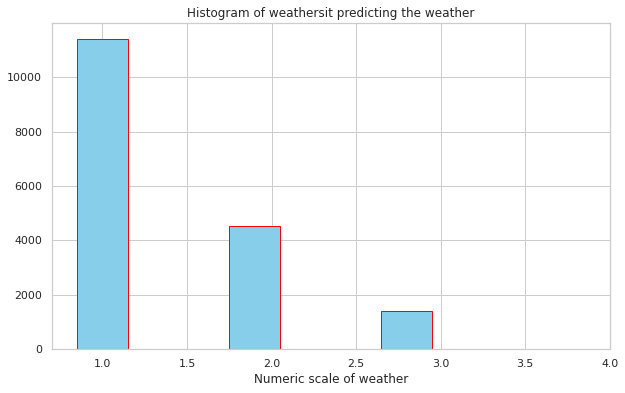

In [ ]:
plt.hist(df['weathersit'], align = 'left', color = 'skyblue', edgecolor = 'red',
         linewidth = 1)
plt.title("Histogram of weathersit predicting the weather")
plt.xlabel("Numeric scale of weather");


Herein, from this plot, we can observe that most of the times, the weather is clear sky and no time when there are heavy rains. 

As compared to the heavily cloudy weather, the weather is observed most of the times to be partially cloudy than heavily cloudy weather.

In [ ]:
df['temp'].value_counts().head(5)  

0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
Name: temp, dtype: int64

'temp' has temperature values in celcius. The values have already been normalized using min-max normalizaion. This is a continuous variable.



In [ ]:
df['windspeed'].value_counts().head(5)  

0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
Name: windspeed, dtype: int64

'windspeed' has the average windspeed for the hour, also stored using min-max normalization. This is a continuous variable.
 
It is observed that very few people rent a bike in higher winds.


Now, let's look at the overall users count.

In [ ]:
print(df['cnt'].value_counts().head(5)) 
print("------------------------------------------------------------------------")
print(df['cnt'].sum())

5    260
6    236
4    231
3    224
2    208
Name: cnt, dtype: int64
------------------------------------------------------------------------
3292679


Finally, 'cnt' - count simply has the number of users per hour, stored in integer values. This is also a continuous variable.

Let's now plot a graph about these variables and see the outcomes.

Looking for a variable that could give us a histogram plot. So, first, let's look at the 'temp' - temperature and observe its trends. 
 
A '**Histogram**' shows the use of the distribution of a single numeric variable.

So, here we are plotting the histogram of a single numeric variable - 'temp'.

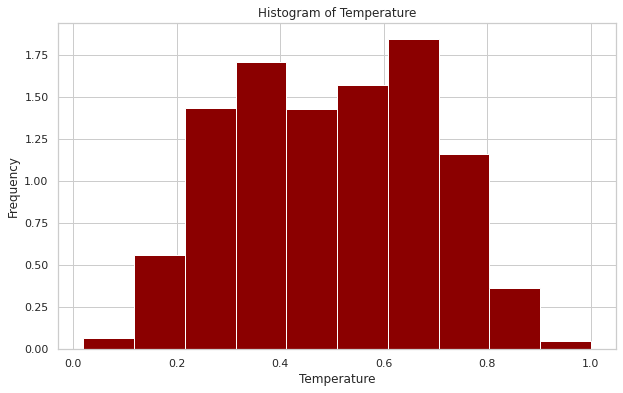

In [ ]:
plt.hist(df['temp'], cumulative = False, density = True, color = 'darkred')
plt.title("Histogram of Temperature")
plt.ylabel("Frequency")
plt.xlabel("Temperature");

This histogram shows us that temperature is not extreme, but it trends slightly warmer on average.

##Which is the better variable we can use for temperature?

The dataset has two different values for temperature, 'temp' and 'atemp'. Because these serve a similar purpose we only want to use one of these variables. In order to find out which we should use we look at both side by side.

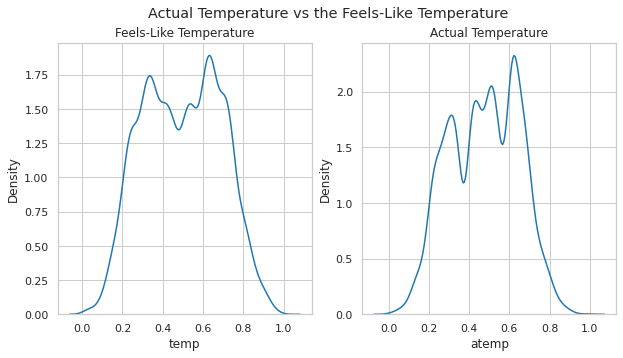

In [ ]:
x = df['temp']
y = df['atemp']

fig,axes = plt.subplots(1,2, figsize = (10,5))

fig.suptitle("Actual Temperature vs the Feels-Like Temperature")
sns.kdeplot(x=x, ax = axes[0])
sns.kdeplot(x=y, ax = axes[1])
#
axes[0].set_title("Feels-Like Temperature")
axes[1].set_title("Actual Temperature")
plt.plot();

From these graphs, we can see that the Feels-like temperature is more evenly distributed from 0.2 to 0.7. Because of this and the idea that most people experience temperature as the feels like value rather than the actual value, we will be using temp for this project going forward.


#**Data cleaning and preprocessing**

We are interested in looking at how the time of day and weather can affect the overall number of bike share users. Because of this, we do not need data having to do with the exact date, year, day of week, or number of casual vs registered users. Therefore we can drop all columns that we do not need.

In [ ]:
df = df.drop_duplicates()
df.shape

(17379, 17)

Now, we are going to drop the columns which we are not going to use.

In [ ]:
df.drop(['instant', 'dteday', 'mnth', 'yr', 'holiday', 'atemp'], axis=1, inplace=True)
df.info()
print("The number of actual rows: {}".format(df.shape[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   hr          17379 non-null  int64  
 2   weekday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weathersit  17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   hum         17379 non-null  float64
 7   windspeed   17379 non-null  float64
 8   casual      17379 non-null  int64  
 9   registered  17379 non-null  int64  
 10  cnt         17379 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.6 MB
The number of actual rows: 17379


Looking at the columns we have left, we can see that there are no Nan values or empty string values, as the data is already cleaned.

####Replacing the unknown values with nan values:

In [ ]:
print(df.isna().mean().mean())
print("------------------------------------------------------------------------")
(df.select_dtypes(include='object')=="").sum().sum()

0.0
------------------------------------------------------------------------


0.0

Since, we do not have any missing or nan values, we are not replacing any of the columns with any other one.

#**Data Exploration and visualization**

Now that the data is cleaned we can look at which of our variable have a clear impact on the number of users per hour.

###What about the density of the number of users renting the bikes?

Let's figure out that. So for that, first, we will look at the density of the number of users.

A '**Density plot**' is used for visualizing the distribution of a continuous numerical variable in a dataset.

'**Density plot**' is also known as '**Kernel Density plot**'.

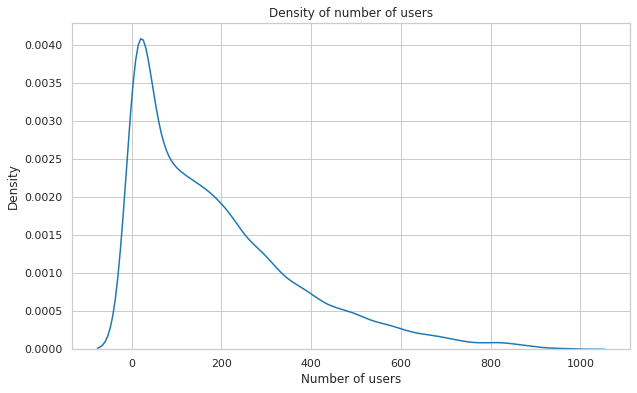

In [ ]:
sns.kdeplot(x='cnt', data=df)
plt.title("Density of number of users")
plt.ylabel("Density")
plt.xlabel("Number of users");


From the density plot we can see that, most often, there are around 50 users for any given hour. The density sharply drops off until around 100 users, where it starts to decrease more gradually. This tells that a high number of users, up to 1000, is possible, but the common case is less than 250.

###Now that we have found out the density of the number of users, but what are the users renting the bikes per hour?

For that, we will take a look at the average number of users for each hour of the day. We can use a barplot to find out it.



A '**Bar plot**' is the plot or graph that presents the categorical data with rectangular bars with the height of the bars proportional to the values they represent.

It displays a list of quantities and counts the showing of categorical variables.

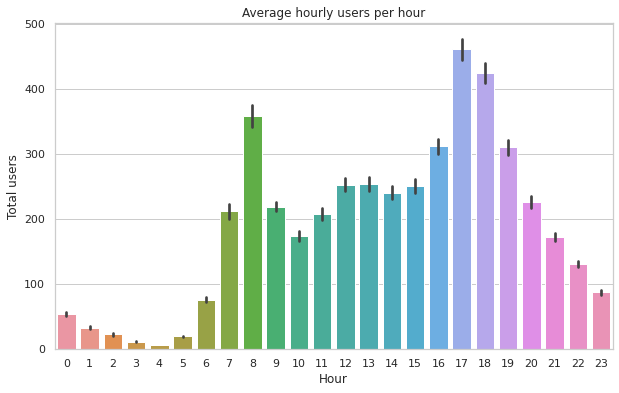

In [ ]:
sns.barplot(x='hr',y='cnt',  data=df);

plt.title("Average hourly users per hour")
plt.xlabel("Hour")
plt.ylabel("Total users");

From this graph we can see that the total number of users spikes at 8 am and 5-7 pm, then heavily drops off during the night and early morning. Mid day still has a high number of users, with 9 am through 4 pm each having close to 250 total users.

In the morning, it is observed that, at 4 am, the lowest number of bike users spikes, while the highest is observed in the evening at 5pm.

Next we will look at the total users for each day of the week, and see if there are any large shifts in users between days.

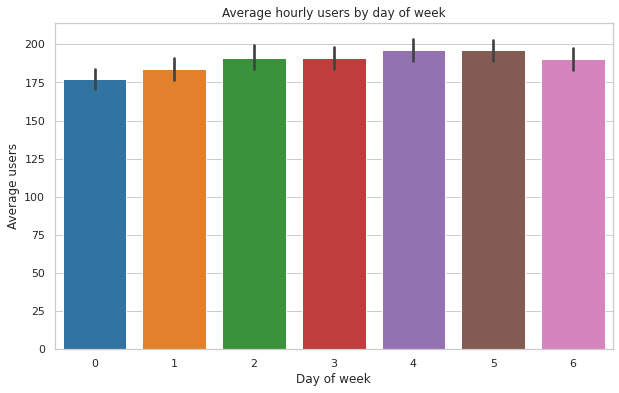

In [ ]:
sns.barplot(x='weekday',y='cnt',  data=df);

plt.title("Average hourly users by day of week")
plt.xlabel("Day of week")
plt.ylabel("Average users");

The graph shows us that the users are, for the most part, evenly spread over over the days. There is a slight trend upwards from day 0 to day 4, then back down over days 5 and 6, but it is statistically insignificant.

###Is there any relation for the number of the users renting the bikes based on the weather?

Next, for that we will look at the total users for each category of weather. We can use box plot for finding out this.

'weathersit' is a categorical variable. 

A '**Box plot**' can show distribution of quantitative variable for each value of categorical variable. It draws a vertical line for the middle value, it is called the '**Median**'. It draws a box. They are mostly useful for displaying the skewed data.

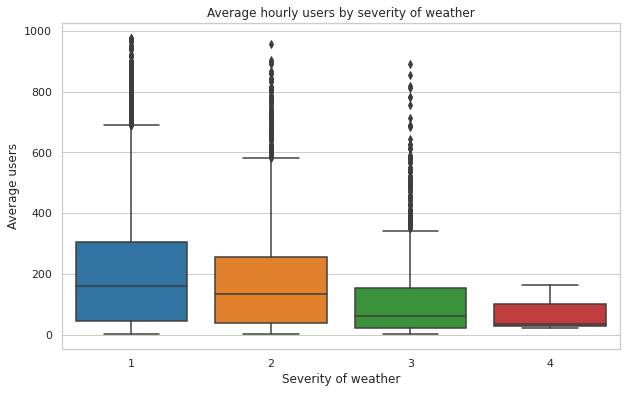

In [ ]:
sns.boxplot(x='weathersit', y='cnt',  data=df)
plt.title("Average hourly users by severity of weather")
plt.xlabel("Severity of weather")
plt.ylabel("Average users");

We can tell that the total number of users goes down with each increase in weather severity. The highest weather severity has a large margin for error. Look at the mean we can see that the average value for 3 and 4 are both much lower than the highest 25% of points.

###Shall we also figure out whether the average hourly bike-sharing users are renting the bikes depending on the severity of the weather or what?

Let's plot a histogram for figuring out whether really the users are renting the bikes according to the severity of the weather or not.

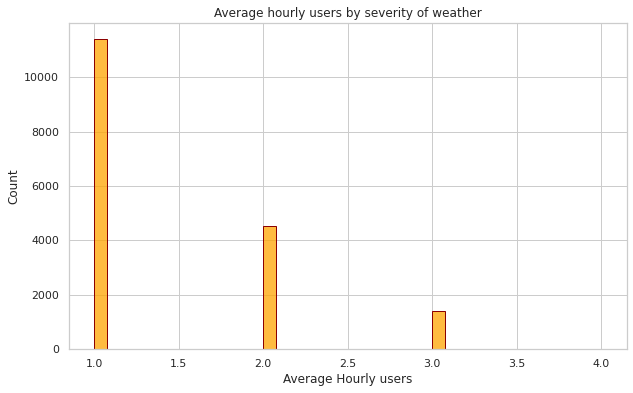

In [ ]:
sns.histplot(x='weathersit',  data=df, color = 'orange', edgecolor = 'darkred');
plt.title("Average hourly users by severity of weather")
plt.xlabel("Average Hourly users")
plt.ylabel('Count');

If we look at a histogram of weather severity, we can see that there are a very few number of hours where the weather severity is at its highest, and this low sample size leads to the mean value of average riders being skewed.

It can happen like the density of the users are based on the temperature. So, we need to find out that also.



Now, we compare the users during different temperatures using a density plot. For that, we are going to use the variables: 'temp' and 'cnt'.


Since, there are two variables and we want to plot a density plot, we are plotting a **two-variable density plot**, which is called the '**Double Density plot**'. 

'**Double Density plot**' is also known as "**Contour plot**". It plots the graph in 3 dimensions, just like for example, a topographic map showing the altitude.

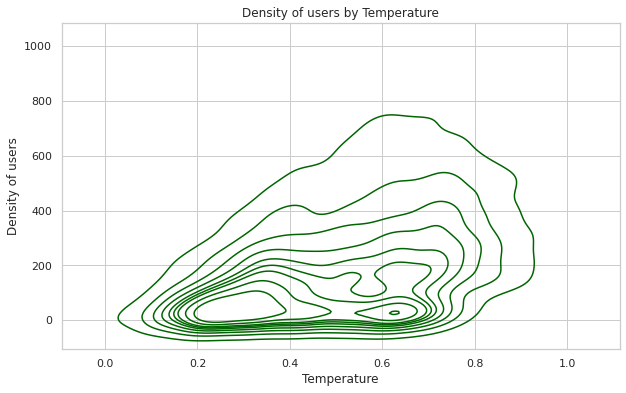

In [ ]:
sns.kdeplot(x='temp', y='cnt',  data=df, color = 'darkgreen')
plt.title("Density of users by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Density of users");

This density plot shows us that the most common case is to have between 0 and 100 users with the temperature between .2 and .4, and .55 and .65. As the temperature gets colder the number of users drops off sharply, where as the variation in the amount of users increases as temperature increases.

Finally, we will look at how the seasons affect the number of users. We are using barplot for the comparison.




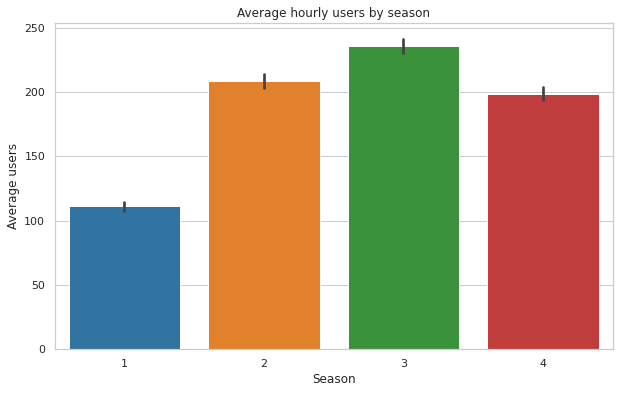

In [ ]:
sns.barplot(x='season', y='cnt',  data=df);
plt.title("Average hourly users by season")
plt.xlabel("Season")
plt.ylabel("Average users");

This graph shows us that rates of users is steady for spring, summer and fall with a slight increase in fall. Winter has a lower rate of use with a little more than half of the average users.

A **crosstab** is a table that allows you to analyze the correlation between data. We can use crosstabs to easily set up bar graphs that give us information on the relationship of two variables.

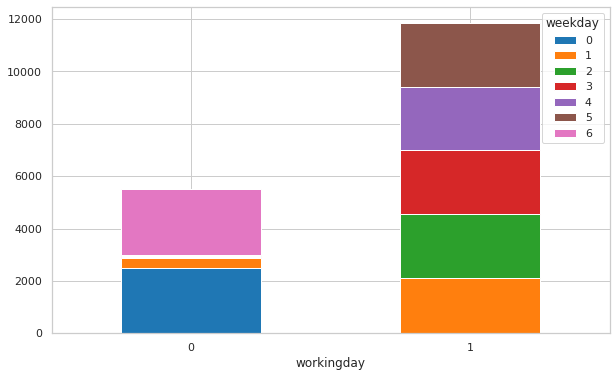

In [ ]:
pd.crosstab(df['workingday'], df['weekday']).plot.bar(stacked = True, rot = 0);

This crosstab shows us that working days is a binary classification variable. We can see that 1 - 5 are often considered working days, while 0 and 6 are never considered working days. This is most likely because 0 and 6 are Saturday and Sunday. We can also see that occasionally days that are normally working days are considered nonworking days, this is probably due to holidays. 

A 'scatter plot' is used to see how much one variable is affected by another or the relationship between them with the help of dots in two dimensions.

So, we would like to see that there is any relationship between the count and humidity. Thus, let's plot a scatter plot.

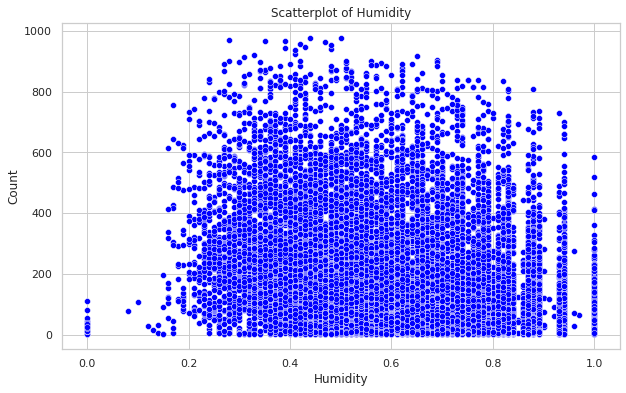

In [ ]:
sns.scatterplot(x = 'hum', y = 'cnt', data = df, color = 'blue')
plt.title('Scatterplot of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count');

Through this scatterplot, it is clearly seen that there is overplotting.

'**Overplotting**' happens when many points are plotted almost on top of each other. Mostly, overplotting is seen in scatterplots.

In order to deal with overplotting, we can either make the dots transparent or smaller or we can just focus on the outlined dots.


So, here we are going to use the method of 'outlined dots'. The 'alpha' parameter is used to change the color intensity of the plot.



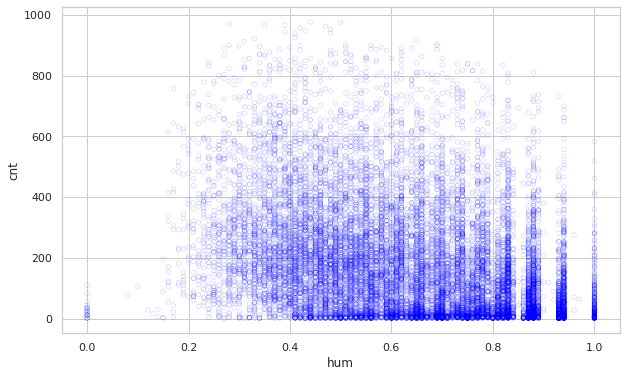

In [ ]:
sns.scatterplot(x = 'hum', y = 'cnt', s = 20, alpha = 0.3,  color = 'none', edgecolor = 'blue', data = df);

This scatterplot of count and humidity that has been corrected for overfitting shows us that a majority of rides land around 100 users with humidity between .4 and .8. As the humidity climbs, there is more of a concentration at lower count values, meaning fewer people are riding.

The features like the temperature, windspeed and count can be related and find the relationships between these variables.

We can use pair plot for finding the relationship between these variables.

A '**pair plot**' allows to see the distribution of single variables and relationships between those variables.

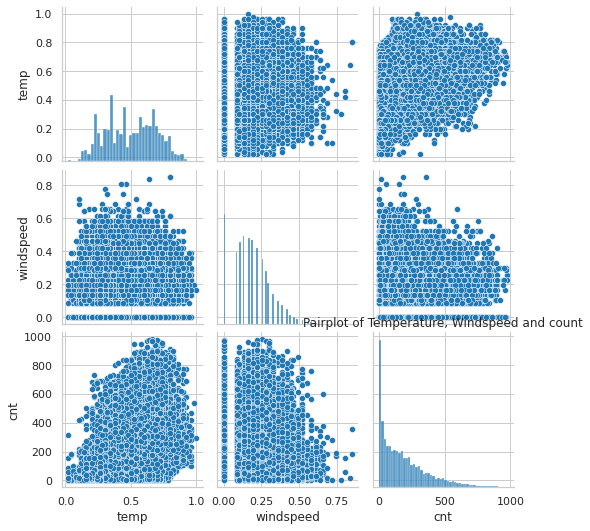

In [ ]:
sns.pairplot(df, vars = ['temp', 'windspeed', 'cnt'])
plt.title("Pairplot of Temperature, Windspeed and count");

\This pair plot gives us a lot of information about the correlation between different variables. We can see that count trends up with temperature until extreme temperatures. We can also see that a majority of wind speeds are low, and when wind speed is high users drop off sharply.

#**Machine Learning**

Finally, we can start using machine learning algorithms to predict how many users there will be in an hour with certain parameters.

###**kNN Regression**

kNN stands for "**K-Nearest Neighbour**". 
**kNN Regression is supervised learning method.** It predicts the quantity.

The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'k'. 

First we will use Knn Regression to make a model that can predict the number of users given certain parameters. Before we start we will use a sequential feature selector to find the best parameters to use.

In [ ]:
predictors = np.array(['hr', 'weekday', 'temp', 'weathersit', 'season', 'windspeed'])

First we make a list of all of the variables we may use to predict the vlaue.

In [ ]:
X=df[predictors].values
y=df['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Then we set up a test train split of the data using those predictors and cnt, which is our target variable

In [ ]:
selector = SequentialFeatureSelector(KNeighborsRegressor(), n_features_to_select=3, cv=5)
selector.fit(X_train, y_train)
feature_mask = selector.get_support()

Finally, we let the algorithm train on the data. We will be finding the 3 best predictors.

In [ ]:
print(predictors[feature_mask])

['hr' 'weekday' 'temp']


We get the three best variables to use are the hour, the day of week, and the temperature.

In [ ]:
pred = predictors[feature_mask]
X = df[pred]
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Now we will set up a Knn model using those variables. First we need to make another test train split using the variables we just found.

###Computing the Baseline Accuracy

**Baseline Accuracy** is the accuracy got by always predicting the most common class. 

In [ ]:
baseline_accuracy = np.sqrt(((y_train.mean() - y_test)**2).mean())
print("Baseline Accuracy: {:.3f}".format(baseline_accuracy))

Baseline Accuracy: 177.837


We can also, take a look at the value that appears most in y_train.

Computing the value appearing mostly in 'y_train' is called the "**Blind Prediction**". We can always compute the **training set accuracy**, if we predict the blind prediction.

In [ ]:
print("Baseline accuracy: {:.3f}".format((1- y_test).mean()))

Baseline accuracy: -184.323


Before we train, we will take the baseline accuracy. We will do this by finding the **Root Mean Squared Error (RMSE)** of, if we guessed the average number of users each time. This calculation shows us that our baseline accuracy is 177.873

In [ ]:
KnnReg = KNeighborsRegressor(n_neighbors = 3)
KnnReg.fit(X_train, y_train)
y_pred = KnnReg.predict(X_test)

Now we will train the model, using 3 for the n_neighbors parameter.

In [ ]:
rmse = np.sqrt(((y_pred - y_test)**2).mean())
print("Model Accuracy: {:.3f}".format(rmse))

Model Accuracy: 94.144


Here we see the the accuracy of our model is 94.144, which is more accurate than simple guessing the average each time.

Now that we have a model and it is working to predict number of users we can tune it to make it more accurate. To help us tune the model we will graph the learning curve.

###Cross validation

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(KnnReg, X_train,y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
print('Negative Cross validation accuracy: {:.3f}'.format(test_scores.mean()))

def plot_learning_curves(train_sizes, train_scores, test_scores):
  train_scores_mean = np.mean(train_scores, axis = 1)
  test_scores_mean = np.mean(test_scores, axis = 1)
  plt.plot(train_sizes, train_scores_mean, label = 'train')
  plt.plot(train_sizes, test_scores_mean, label = 'test')

  plt.title("Learning curve plot")
  plt.xlabel('training set size')
  plt.ylabel('accuracy')
  plt.legend();
  

Negative Cross validation accuracy: -102.923


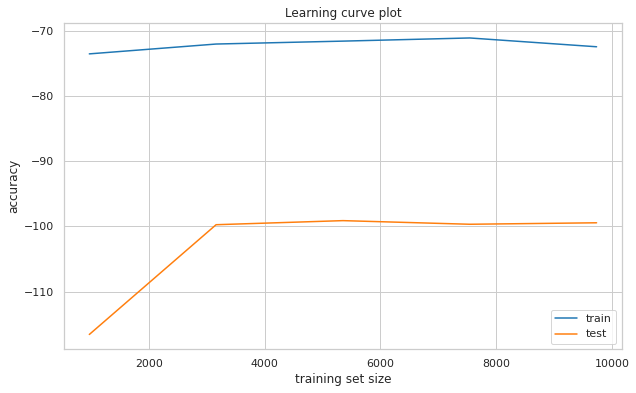

In [ ]:
plot_learning_curves(train_sizes, train_scores, test_scores)

This learning curve plot shows us that there is a large difference between our training accuracy and test accuracy, which shows that our algorithm has a **High variance**.

When there is High variance situation, it means there is '**Overfitting**'. **The most important symptom of** **Overfitting is that there is big difference between training and test error.**

So, the next step is to reduce overfitting. However, it will be simple and faster to perform the grid search cv.

Our goal is a high test accuracy. Avoiding overfitting is not a goal in itself, but simply a way to try to achieve high test accuracy.

So, we can correct this by finding a better k value for our model.

###GridSearch CV

With kNN there is one main parameter that the user needs to set, k. K is the number of data points the model considers when making a prediction. **Cross Validation** allows us to find the value of parameters we need to use to get the best result from our model.

We will use GridSearch Cross Validation to test a range of k values and find which works best. 

In [ ]:
cv_accuracy = []
k1 = range(3, 40, 2)
for k in k1:
  knn = KNeighborsRegressor(n_neighbors = k)
  accuracy = cross_val_score(knn, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5)
  cv_accuracy.append(accuracy.mean())

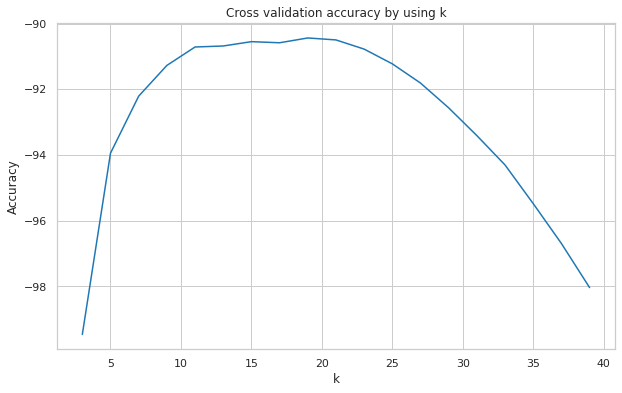

In [ ]:
plt.plot(k1, cv_accuracy)
plt.title("Cross validation accuracy by using k")
plt.xlabel('k')
plt.ylabel('Accuracy');

This plot shows us the accuracy of our model using a range of K values from 3 to 40. We can see that the model improves greatly from 3 to 10, then the accuracy slowly improves until 21. After 21 accuracy starts to drop off. From the graph of K values, we can see that a K value around 20 gives us the best result.


Now we can remake our model using the k value we found.

In [ ]:
clf = KNeighborsRegressor(n_neighbors = 20)
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv = 5,
                                                        scoring = 'neg_root_mean_squared_error')

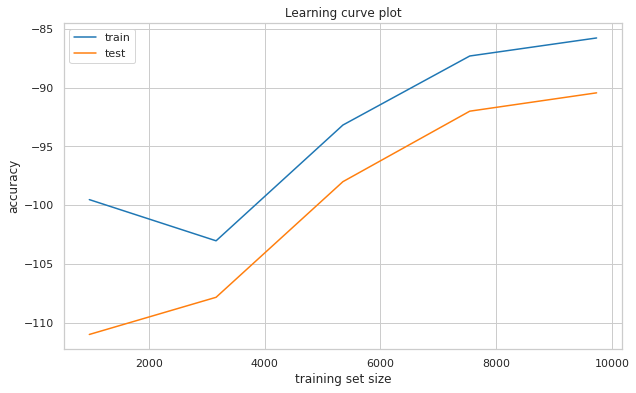

In [ ]:
plot_learning_curves(train_sizes, train_scores, test_scores)

The learning curve plot of our new model shows us that the high variance has been corrected. It also means that overfitting is pretty much reduced.

In [ ]:
KnnReg = KNeighborsRegressor(n_neighbors = 20)
KnnReg.fit(X_train, y_train)
y_pred = KnnReg.predict(X_test)

rmse = np.sqrt(((y_pred - y_test)**2).mean())
print("Model Accuracy: {:.3f}".format(rmse))

Model Accuracy: 85.716


Our final Knn model has a root mean squared error of 85.7, which is a slight improvement from our previous model and a great improvement on the baseline accuracy that we found.

In [ ]:
KnnReg.score(X_test, y_test)

0.7674252181857754

###**Conclusion of kNN Regression**

Finally, we can see our kNN model has a score of .76. This means that our kNN model is able to relatively accurately predict the number of users for an hour given the time of day, day of the week, and temperature.

###**Logistic Regression**

The most important thing about Logistic regression is that it is **supervised learning method **and it is a classification method and not regression method. 


It finds the best linear relationship between the dependent and independent variable.

Now we will use logistic regression to predict whether an hour takes place on a working day or a not.


It's much faster to train logistic regression than kNN regression.

In [ ]:
predictors = np.array(['hr', 'weekday', 'temp', 'weathersit', 'season', 'windspeed', 'casual', 'registered'])

X=df[predictors].values
y=df['workingday'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

selector = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=3, cv=5, scoring='accuracy')

selector.fit(X_train, y_train)
feature_mask = selector.get_support()
print(predictors[feature_mask])

['temp' 'casual' 'registered']


First, we find the predictors that will work best with our logistic regression model using sequential feature selection. We find that temperature, number of casual users, and number of registered users work best.

In [ ]:
predictors = predictors[feature_mask]
target = 'workingday'

X=df[predictors].values
y=df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

First we set up a train test split using the predictors we just found and workingday as our target.

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = (clf.predict(X_test) > 0.5).astype(int)

Now we train the model on that data.

In [ ]:
rmse_blind = (1 == y_test).mean()
print('Baseline Accuracy: {:.2f}'.format(rmse_blind))
accuracy = (y_pred == y_test).mean()
print('Accuracy: {:.2f}'.format(accuracy))

Here we can see that we got an accuracy of .76, which is a slight improvement over our baseline accuracy of .69.

###Confusion Matrix

In order to find out how to improve our model we can use a **Confusion Matrix**. A confusion matrix shows us how many times our model predicted that it was a working day correctly and incorrectly, and how many times it predicted that it wasn't a working day correctly and incorrectly.

In [ ]:
def print_conf_mtx(y_true, y_pred, classes=None):
    if not classes:
        classes = ['neg', 'pos']
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left = '{:<10s}'.replace('10',str(n))
    right = '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    cm = confusion_matrix(y_test, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))

print_conf_mtx(y_train, y_pred)

From the confusion matrix, we can see our model has a lot of false positives. We can fix this by changing the threshold the algorithm is using. To find the best threshold we can make an ROC plot. An **ROC Plot** is a graph that shows the percentage of false positives on the x-axis and the percentage of true positives on the y axis. This can be used to help us find a threshold value that will give us a good trade-off of making correct predictions and limiting incorrect predictions.


In [ ]:
f1, f2, values_of_threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(f1, f2)
plt.title('ROC curve for logistic regression')
plt.plot(f1, f2, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This ROC plot tells us that there is a mostly linear trade-off between the true positive rate and the false positive rate of our model, so any improvement to the false positive rate is going to come at the cost of the true positive rate. We likely don’t have the data needed to accurately predict working days.

Now we will use linear regression to see if we can make a model that can predict the total number of users for a given hour better than the Knn model we made earlier.

###**Forward Feature Selection**

In [ ]:
predictors = np.array(['hr', 'weekday', 'temp', 'weathersit', 'season', 'windspeed'])

X=df[predictors].values
y=df['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3, cv=5, scoring='neg_root_mean_squared_error')

selector.fit(X_train, y_train)
feature_mask = selector.get_support()
print(predictors[feature_mask])

In [ ]:
X = df[predictors[feature_mask]].values
y = df['cnt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

reg = LinearRegression()


reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
test_RMSE = np.sqrt(((y_pred - y_test)**2).mean())
print('the test RMSE is: ',test_RMSE)


###**Polynomial Features**


applying polynomial features to both the training and test data.

In [ ]:
pf = PolynomialFeatures(degree=3, include_bias=False)

pf.fit(X)
X_poly = pf.transform(X)
print(X_poly.shape)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

###**Linear Regression**

Building our model with all the features.

In [ ]:
reg = LinearRegression()


reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('prp = {:.2f} + {:.2f}*cs'.format(reg.intercept_, reg.coef_[0]))

Now we can head to calculate the train and test RMSE.

In [ ]:
y_pred = reg.predict(X_test)
y_predtrain = reg.predict(X_train)

Now, let's find out the rmse of train-test data by writing a function for it.

In [ ]:
rmse_of_test = np.sqrt(((y_pred-y_test)**2).mean())
rmse_of_train = np.sqrt(((y_predtrain-y_train)**2).mean())


Now, we can print the RMSE of both the train and test data

In [ ]:
print('rmse_of_train: ', rmse_of_train, '\nrmse_of_test: ', rmse_of_test)

Looking at the test accuracy we can see we have a better accuracy than the baseline, but our linear regression algorithm isn't as good as our Knn algorithm.

In [ ]:
reg.score(X_test, y_test)

###**Conclusion of Linear regression**

We calculate that the score for our linear regression model is .511. This means the model is not very accurate when predicting the number of users, and the kNN model we made earlier is more accurate.


#**Anomaly Detection**

**Anomaly detection** is an "**Unsupervised learning method**".

1. It find the items that aren't normal.





2. There are two types of Anomaly detection. They are 'Outlier detection' and 'Novelty detection'. 

3. Outlier detection is an analysis for identifying the data points (outliers) whose feature values are different from those of the normal data points in a particular dataset.


4. Novelty Detection works by identifying the outlying data and information.



5. Here, a point is an anomaly if the distance to the kth nearest neighbor exceeds a threshold.



Let's see if we could find any anomolies with the help of LocalOutlierFactor.

First we need to declare our features. We will be looking at windspeed and count.

In [ ]:
features = ['windspeed', 'cnt']

Now we will scale the features so both features are evenly spaced.

In [ ]:
df[features] = StandardScaler().fit_transform(df[features])
X = df[features].values

Now we will let the algorithm find outlier points.

###Local Outlier Factor (LOF):

The anomaly score of each sample is called the Local outlier factor. It measures the local deviation of the density of a given sample with the respect to its neighbors.

In Local Outlier Factor, if the outlier factor values are greater than 1, then it means that there is lower density than the neighbors (those are called 'outliers').
And, if the outlier factor values are less than 1, it means that there is higher density than neighbors ( those are called the 'inliers').

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20)
outliers = clf.fit_predict(X)


In [ ]:
sns.scatterplot(x=features[0], y=features[1], data=df, s=30,
hue=outliers, palette=['tab:red', 'tab:blue'])
plt.title('College anomalies, k={}'.format(clf.n_neighbors))
plt.plot();

Using the scatter plot we can see the outliers highlighted in red. We can see that it is rare to have an especially high count or wind speed. There are also some points that have a high count and a high windspeed. If we looked at a bar graph of the windspeed, we would see that the highest windspeed also has the highest count, despite other values having higher averages on the scatter plot. this is due to those outliers.

In [ ]:
sns.barplot(x='windspeed',y='cnt',  data=df);

We can also perform anomaly detection using the outlier factor values.

In [ ]:
clf = LocalOutlierFactor(n_neighbors=3)
clf.fit(X)


In [ ]:
factor = -clf.negative_outlier_factor_

In [ ]:
threshold = np.quantile(factor, 0.99)
outliers = (factor> threshold).astype(int)

sns.scatterplot(x = features[0], y = features[1], data = df, s = 30, 
                hue = outliers, palette=['tab:red', 'tab:blue'])
plt.title("Anomaly detection using the outlier factor values");

This inverted anomaly detection graph shows us the points representing the most common scenarios. We can see a mild wind speed with a middling amount of users is most common.

#**Conclusions**

While analyzing the bike-sharing data most of what we found was as we expected. The number of users who would use the bike-sharing service on a given hour was dependent on the time, the severity of weather, temperature, and wind speed. This makes sense as not many people are going to choose a bike for transportation if it is dark out, raining, hotter or colder than normal, or really windy. Using these factors we were able to make machine learning models that could predict the number of bike-sharing users significantly better than using the mean number of users per hour. We were also able to use polynomial features, cross-validation, and feature selection to improve the machine learning models we made, eventually giving us one with a root mean squared error several times better than the baseline accuracy.